# EDA FINAL



In [163]:
#import the basic libraries
#pandas, numpy, sklearn, matplotlib, seaborn, scipy
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import re
%matplotlib inline
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)

In [68]:
dframe=pd.read_csv("old.campaign.csv")

In [69]:
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Name               1000 non-null object
Age                1000 non-null int64
Gender             1000 non-null object
Area               1000 non-null object
Email              1000 non-null object
Mobile             1000 non-null object
Logins 4 weeks     1000 non-null int64
Logins 6 months    1000 non-null int64
Sales 4 weeks      1000 non-null int64
Sales 6 months     1000 non-null int64
Sales total        1000 non-null int64
Response           1000 non-null object
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [70]:
dframe.head(10)


,Name,Age,Gender,Area,Email,Mobile,Logins 4 weeks,Logins 6 months,Sales 4 weeks,Sales 6 months,Sales total,Response
0,COX,64,female,urban,free,never,1,1,0,0,0,no
1,FARLEY,49,male,urban,premium,never,0,4,0,0,0,yes
2,HYDE,63,male,urban,free,never,0,0,0,0,0,no
3,SANTIAGO,75,male,urban,premium,yes,0,0,0,0,0,yes
4,COPELAND,37,female,urban,free,yes,0,0,0,0,62,no
5,HUNT,30,male,urban,free,yes,0,8,0,30,30,yes
6,GILLESPIE,58,male,urban,free,yes,0,8,0,0,0,yes
7,FREEMAN,35,female,urban,free,yes,0,0,0,0,0,no
8,HOBBS,21,female,urban,free,never,0,8,0,0,0,no
9,CONLEY,35,male,urban,free,yes,0,0,0,0,155,yes


In [71]:
dframe.tail(10)


,Name,Age,Gender,Area,Email,Mobile,Logins 4 weeks,Logins 6 months,Sales 4 weeks,Sales 6 months,Sales total,Response
990,WALLS,53,female,urban,free,never,2,2,0,0,0,no
991,HINTON,54,female,rural,free,never,0,5,0,0,0,no
992,GIBBS,43,female,urban,premium,yes,0,0,0,0,0,yes
993,JENSEN,44,female,urban,free,never,0,0,0,0,0,no
994,CHAPMAN,45,male,urban,premium,yes,0,0,0,0,0,yes
995,VANCE,24,male,urban,free,yes,0,0,0,0,0,yes
996,REYES,40,female,urban,premium,yes,0,9,0,183,411,yes
997,COHEN,27,female,urban,free,never,0,0,0,0,0,no
998,STOUT,40,female,urban,premium,yes,0,0,0,0,0,yes
999,COOLEY,45,female,urban,free,never,0,3,0,66,66,no


In [72]:
dframe.shape


(1000, 12)

In [73]:
dframe.columns


Index(['Name', 'Age', 'Gender', 'Area', 'Email', 'Mobile', 'Logins 4 weeks',
       'Logins 6 months', 'Sales 4 weeks', 'Sales 6 months', 'Sales total',
       'Response'],
      dtype='object')

In [74]:
dframe.dtypes

Name               object
Age                 int64
Gender             object
Area               object
Email              object
Mobile             object
Logins 4 weeks      int64
Logins 6 months     int64
Sales 4 weeks       int64
Sales 6 months      int64
Sales total         int64
Response           object
dtype: object

In [187]:
dframe['Response'].value_counts()

no     556
yes    444
Name: Response, dtype: int64

In [192]:
dframe['st'].sum()

28978

# Dropping Name column as unnecessary 

In [75]:
del dframe['Name']

In [76]:
dframe.dtypes

Age                 int64
Gender             object
Area               object
Email              object
Mobile             object
Logins 4 weeks      int64
Logins 6 months     int64
Sales 4 weeks       int64
Sales 6 months      int64
Sales total         int64
Response           object
dtype: object

## EDA 

Gender


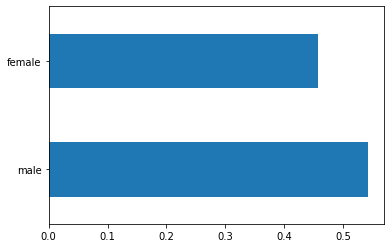

Area


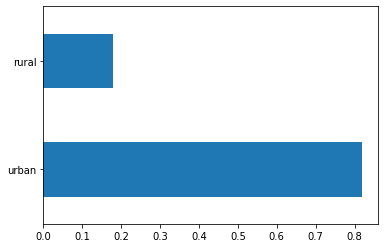

Email


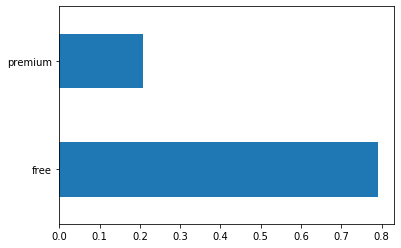

Mobile


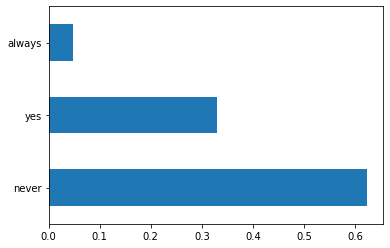

Response


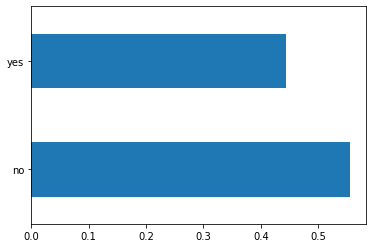

In [77]:
for column in dframe.columns :
    if dframe[column].dtype == 'object':
        print(column)
        prob = dframe[column].value_counts(normalize=True)
        prob.plot.barh()
        plt.xticks()
        plt.show()

In [78]:
# For Numeric Values

In [79]:
dframe.dtypes

Age                 int64
Gender             object
Area               object
Email              object
Mobile             object
Logins 4 weeks      int64
Logins 6 months     int64
Sales 4 weeks       int64
Sales 6 months      int64
Sales total         int64
Response           object
dtype: object

Age
Histogram


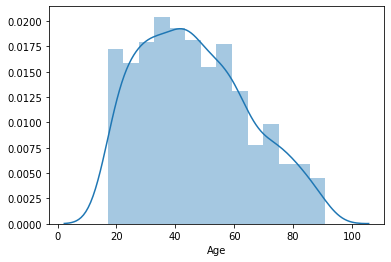

Logins 4 weeks
Histogram


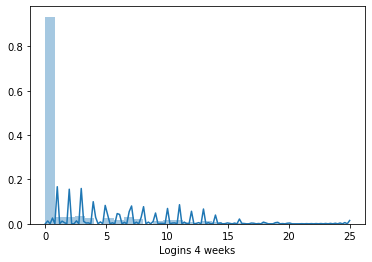

Logins 6 months
Histogram


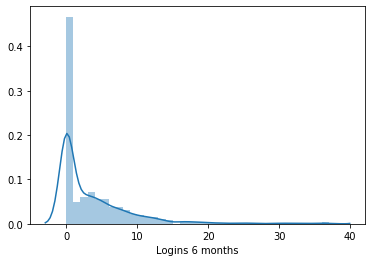

Sales 4 weeks
Histogram


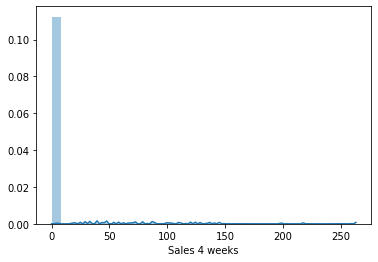

Sales 6 months
Histogram


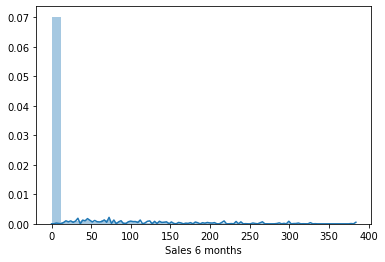

Sales total
Histogram


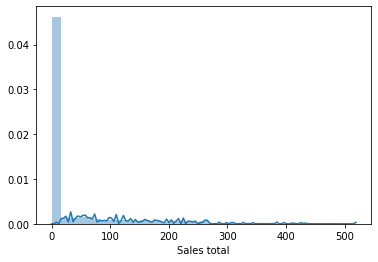

In [80]:
for column in dframe.columns :
    if dframe[column].dtype == 'int64' :
        print(column)
        print("Histogram")
        sns.distplot(dframe[column])
        plt.show()

Age
BOX PLOT


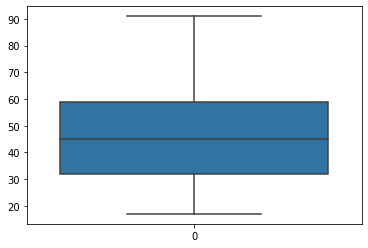

Logins 4 weeks
BOX PLOT


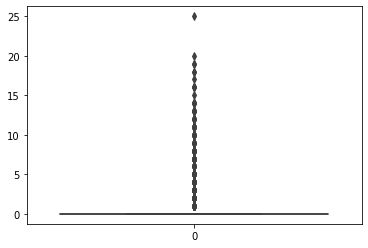

Logins 6 months
BOX PLOT


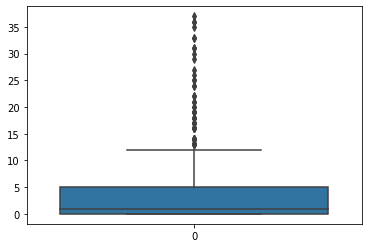

Sales 4 weeks
BOX PLOT


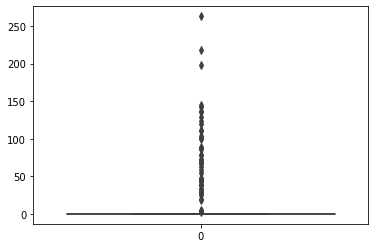

Sales 6 months
BOX PLOT


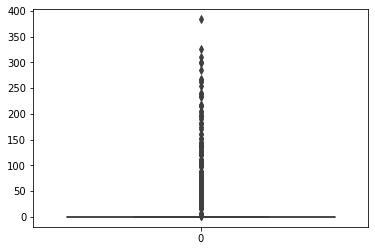

Sales total
BOX PLOT


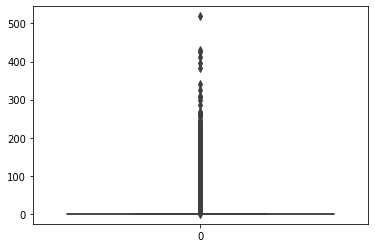

In [81]:
for column in dframe.columns :
    if dframe[column].dtype == 'int64' or dframe[column].dtype == 'float64' :
        print(column)
        print("BOX PLOT")
        sns.boxplot(data = dframe[column])
        plt.show()

In [97]:
# Outlier Removal Function
def outlier(df,column):
    first = df[column].quantile(0.25)
    third = df[column].quantile(0.75)
    IQR = first - third
    noOutlier = dframe[(dframe[column] >= first - 1.5 * IQR) & (dframe[column] <= third + 1.5 *IQR)]
    return noOutlier


In [87]:
dframe['Logins 6 months'].describe()

count    1000.000000
mean        3.578000
std         5.498559
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        37.000000
Name: Logins 6 months, dtype: float64

In [90]:
dfmean = dframe['Logins 6 months'].mean()
print(dfmean)

3.578


In [94]:
# removing 
df1 = dframe['Logins 6 months'].replace([np.arange(8,40)], dfmean)


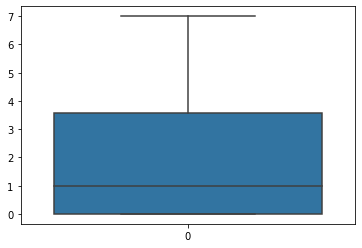

In [95]:
sns.boxplot(data = df1)

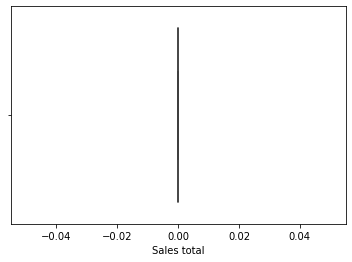

In [104]:
df2 = outlier(dframe,'Sales total')
sns.boxplot(df2['Sales total'])

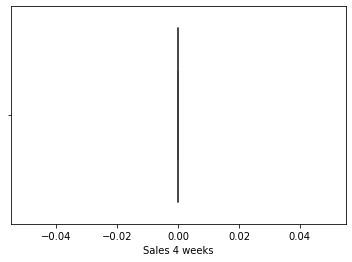

In [105]:
df3 = outlier(dframe,'Sales 4 weeks')
sns.boxplot(df3['Sales 4 weeks'])

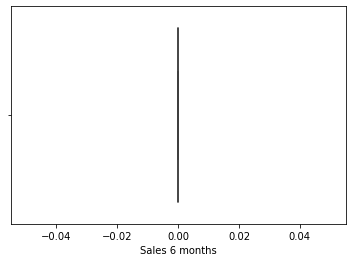

In [106]:
df4 = outlier(dframe,'Sales 6 months')
sns.boxplot(df4['Sales 6 months'])

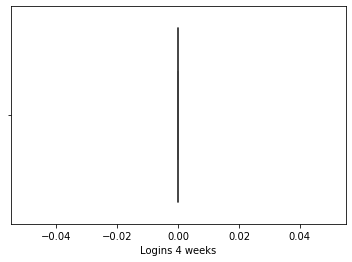

In [107]:
df5 = outlier(dframe,'Logins 4 weeks')
sns.boxplot(df5['Logins 4 weeks'])

In [108]:
# all values other than zero ae outliers


# T TEST

In [110]:
dframe.head(10)

,Age,Gender,Area,Email,Mobile,Logins 4 weeks,Logins 6 months,Sales 4 weeks,Sales 6 months,Sales total,Response
0,64,female,urban,free,never,1,1,0,0,0,no
1,49,male,urban,premium,never,0,4,0,0,0,yes
2,63,male,urban,free,never,0,0,0,0,0,no
3,75,male,urban,premium,yes,0,0,0,0,0,yes
4,37,female,urban,free,yes,0,0,0,0,62,no
5,30,male,urban,free,yes,0,8,0,30,30,yes
6,58,male,urban,free,yes,0,8,0,0,0,yes
7,35,female,urban,free,yes,0,0,0,0,0,no
8,21,female,urban,free,never,0,8,0,0,0,no
9,35,male,urban,free,yes,0,0,0,0,155,yes


In [111]:
dframe['Area'].describe()

count      1000
unique        2
top       urban
freq        820
Name: Area, dtype: object

In [115]:
# NULL HYPOTHESIS NO DIFFERENCE IN TARGETTING RURAL AND URBAN 
urban = dframe[dframe['Area']=='urban']
rural = dframe[dframe['Area']=='rural']
t, p = stats.ttest_ind(urban['Sales total'],rural['Sales total'])
print(p)

0.40934819998464733


In [114]:
# Analysis of Above T Test
# no relation
# NULL HYPOTHESIS ACCEPTED AS P VALUE IS GREATER THAN 5% 


In [117]:
# NULL HYPOTHESIS NO DIFFERENCE IN RESPONSES
yes = dframe[dframe['Response']=='yes']
no = dframe[dframe['Response']=='no']
t, p = stats.ttest_ind(yes['Sales total'],no['Sales total'])
print(p)

1.1250615464146332e-12


In [118]:
# Analysis of above T Test
# relation= yes , hypothesis rejected
# Sales total is dependent on Responses


# 1 way Anova

In [119]:
dframe.dtypes

Age                 int64
Gender             object
Area               object
Email              object
Mobile             object
Logins 4 weeks      int64
Logins 6 months     int64
Sales 4 weeks       int64
Sales 6 months      int64
Sales total         int64
Response           object
dtype: object

In [121]:
for column in dframe.columns :
    print(dframe[column].describe())

count    1000.000000
mean       46.549000
std        18.439947
min        17.000000
25%        32.000000
50%        45.000000
75%        59.000000
max        91.000000
Name: Age, dtype: float64
count     1000
unique       2
top       male
freq       542
Name: Gender, dtype: object
count      1000
unique        2
top       urban
freq        820
Name: Area, dtype: object
count     1000
unique       2
top       free
freq       791
Name: Email, dtype: object
count      1000
unique        3
top       never
freq        624
Name: Mobile, dtype: object
count    1000.000000
mean        1.615000
std         3.585196
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        25.000000
Name: Logins 4 weeks, dtype: float64
count    1000.000000
mean        3.578000
std         5.498559
min         0.000000
25%         0.000000
50%         1.000000
75%         5.000000
max        37.000000
Name: Logins 6 months, dtype: float64
count    1000.000000
mean        3.790

In [127]:
dframe.dtypes

Age                 int64
Gender             object
Area               object
Email              object
Mobile             object
Logins 4 weeks      int64
Logins 6 months     int64
Sales 4 weeks       int64
Sales 6 months      int64
Sales total         int64
Response           object
dtype: object

In [129]:
dframe.rename(columns={"Logins 4 weeks":"l6w"}, inplace=True)
dframe.rename(columns={"Logins 6 months":"l6m"}, inplace=True)
dframe.rename(columns={"Sales 4 weeks":"s4w"}, inplace=True)
dframe.rename(columns={"Sales 6 months":"s6m"}, inplace=True)
dframe.rename(columns={"Sales total":"st"}, inplace=True)


In [130]:
dframe.dtypes

Age          int64
Gender      object
Area        object
Email       object
Mobile      object
l6w          int64
l6m          int64
s4w          int64
s6m          int64
st           int64
Response    object
dtype: object

In [131]:
mod = ols('st ~ Email',dframe).fit()
var = sm.stats.anova_lm(mod)
print(var)

             df        sum_sq      mean_sq         F    PR(>F)
Email       1.0  4.971721e+03  4971.720937  1.059523  0.303573
Residual  998.0  4.683028e+06  4692.412620       NaN       NaN


In [132]:
# Analysis of above Shows no dependency of email, Null Hypothesis accepted

# 2 way anova

In [134]:
mod = ols('st ~ C(Area)*C(Gender)',dframe).fit()
var = sm.stats.anova_lm(mod)
print(var)

                      df        sum_sq      mean_sq         F    PR(>F)
C(Area)              1.0  3.197994e+03  3197.994320  0.680062  0.409763
C(Gender)            1.0  1.987867e+00     1.987867  0.000423  0.983601
C(Area):C(Gender)    1.0  1.108318e+03  1108.317974  0.235687  0.627446
Residual           996.0  4.683691e+06  4702.501221       NaN       NaN


In [135]:
# Above analysis shows no depencies

In [136]:
mod = ols('st ~ C(Area)*C(Response)',dframe).fit()
var = sm.stats.anova_lm(mod)
print(var)

                        df        sum_sq        mean_sq          F  \
C(Area)                1.0  3.197994e+03    3197.994320   0.718277   
C(Response)            1.0  2.290110e+05  229011.005318  51.436392   
C(Area):C(Response)    1.0  2.128503e+04   21285.029347   4.780666   
Residual             996.0  4.434505e+06    4452.314746        NaN   

                           PR(>F)  
C(Area)              3.969133e-01  
C(Response)          1.440965e-12  
C(Area):C(Response)  2.901309e-02  
Residual                      NaN  


In [137]:
# Null hypothesis rejected, relation is there

In [138]:
mod = ols('st ~ C(Gender)*C(Response)',dframe).fit()
var = sm.stats.anova_lm(mod)
print(var)

                          df        sum_sq        mean_sq          F  \
C(Gender)                1.0  3.890321e+00       3.890321   0.000876   
C(Response)              1.0  2.427746e+05  242774.639203  54.693941   
C(Gender):C(Response)    1.0  2.419126e+04   24191.255995   5.449973   
Residual               996.0  4.421030e+06    4438.784870        NaN   

                             PR(>F)  
C(Gender)              9.763882e-01  
C(Response)            2.984464e-13  
C(Gender):C(Response)  1.976661e-02  
Residual                        NaN  


In [ ]:
# Null hypothesis rejected, relation is there

In [139]:
mod = ols('st ~ C(Email)*C(Response)',dframe).fit()
var = sm.stats.anova_lm(mod)
print(var)

                         df        sum_sq        mean_sq          F  \
C(Email)                1.0  4.971721e+03    4971.720937   1.119878   
C(Response)             1.0  2.595883e+05  259588.264734  58.472127   
C(Email):C(Response)    1.0  1.676113e+03    1676.113036   0.377544   
Residual              996.0  4.421763e+06    4439.521503        NaN   

                            PR(>F)  
C(Email)              2.902014e-01  
C(Response)           4.844985e-14  
C(Email):C(Response)  5.390611e-01  
Residual                       NaN  


In [140]:
# Null hypothesis rejected, relation is there

In [143]:
dframe.dtypes

Age          int64
Gender      object
Area        object
Email       object
Mobile      object
l6w          int64
l6m          int64
s4w          int64
s6m          int64
st           int64
Response    object
dtype: object

In [146]:
dfcor = dframe[['Age','l6w','l6m','s4w','s6m','st']]

In [152]:
dfcor.corr()

,Age,l6w,l6m,s4w,s6m,st
Age,1.000000,0.034346,0.030750,0.048361,0.002990,-0.000567
l6w,0.034346,1.000000,0.709797,0.313863,0.136283,0.068170
l6m,0.030750,0.709797,1.000000,0.204321,0.274675,0.173994
s4w,0.048361,0.313863,0.204321,1.000000,0.411679,0.269572
s6m,0.002990,0.136283,0.274675,0.411679,1.000000,0.686884
st,-0.000567,0.068170,0.173994,0.269572,0.686884,1.000000


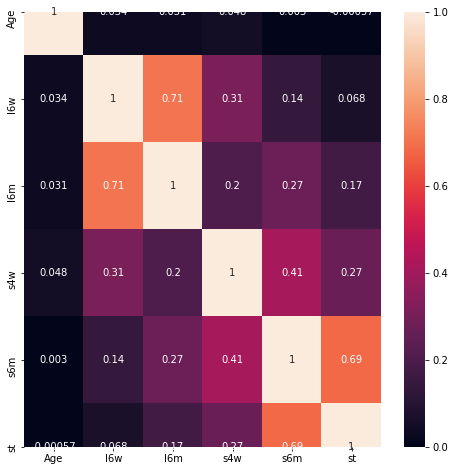

In [151]:
plt.figure(figsize=(8,8))
sns.heatmap(dfcor.corr(),annot= True)
plt.show()

In [153]:
# Age and Sales are indirectly propotional, hence can be said that big people are not contributing to the sales

In [155]:
pd.crosstab(dframe.Gender,dframe.Response,margins=True)

Response,no,yes,All
Gender,,,
female,306,152,458
male,250,292,542
All,556,444,1000


In [156]:
# Males responded more in comparison to females

In [157]:
pd.crosstab(dframe.Area,dframe.Response,margins=True)

Response,no,yes,All
Area,,,
rural,129,51,180
urban,427,393,820
All,556,444,1000


In [158]:
# Urban population response was more than rural at abt 47.9% of Yes

In [159]:
pd.crosstab(dframe.Email,dframe.Response,margins=True)

Response,no,yes,All
Email,,,
free,536,255,791
premium,20,189,209
All,556,444,1000


In [160]:
# Premium Email users responded with total 90% yes

In [161]:
dframe.dtypes

Age          int64
Gender      object
Area        object
Email       object
Mobile      object
l6w          int64
l6m          int64
s4w          int64
s6m          int64
st           int64
Response    object
dtype: object

In [182]:
mc = sm.stats.multicomp.MultiComparison(dframe['st'], dframe['Area'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 rural  urban   4.6547 0.4093 -6.4118 15.7213  False
----------------------------------------------------


In [167]:
# no sig diff observed